# Acceleration

This notebook is devoted to the study of gravity acceleration using data collected with firefox keeping the smartphone at rest.

After importing the relevant packages, we read the CSV files using pandas and extract as many lists as there are columns in the file. Data can be visualised as a matrix. We first obtain its transposed (``.T``), then extract the values ignoring the headers (``.values``), finally we transform each row into a list (``.tolist()``). This way we obtain five lists: the first contains times, the following three the components of the acceleration vector, while the last is a list of accelerations.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = pd.read_csv('../phyphox/acceleration-with-g.csv')
data = f.T.values.tolist()
t  = data[0]
ax = data[1]
ay = data[2]
az = data[3]
a  = data[4]

It can be useful to define a function that returns the values of a gaussian to plot in a given interval. The function returns a list of 500 values representing a gaussian 

$G(x,\,\mu,\,\sigma) = C\exp{\left(\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)}$

in the interval $[x_{min},\,x_{max}]$. Passing a ``matplotlib.pyplot`` object to the function, it plots the 500 values on top of the existing data.

In [4]:
def plotNormal(xmin, xmax, C, mu, sigma, plot):
    gauss = []
    x = np.arange(xmin, xmax, (xmax-xmin)/500)
    for i in range(500):
        gauss.append(C*np.exp(-0.5*((x[i]-mu)/sigma)**2))
    plot.plot(x, gauss, '-')
    return plot

We are then ready to plot data. First of all, we make an histogram of $a_x$ showing its average $\mu_x$ and its standard deviation $\sigma_x$. On top of data we plot a gaussian exploiting the previously defined function. The normalisation function of such a gaussian is the binwidth $b$ times $N$, where $N$ is the number of data in the list. That number represents the intergral under the histogram. The integral of a normal curve is 1, then,

$C=\frac{Nb}{\sqrt{2\pi}\sigma}$

$N$ is obtained just as the length of ``ax``. The binwidth can be obtained knowing that the default number of bins in an histogram is 10.

The histogram is decorated with a latex-formatted label on the $x$-axis and an annotation consisting in an arrow showing the position of the mean. The arrow color is orange and its label is written below and centered with respect to it.

ax = 7.126220156387809 +- 0.006145170360373056


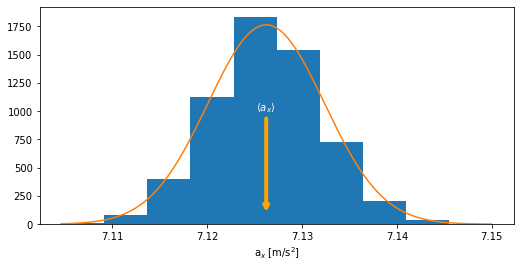

In [53]:
fig = plt.figure(figsize=(8.5,4))
plt.hist(ax)
mux = np.mean(ax)
sigmax = np.std(ax)
print('ax = {} +- {}'.format(mux, sigmax))
bw = (max(ax)-min(ax))/10
C = len(ax)*bw
C /= np.sqrt(2*np.pi)*sigmax
plt = plotNormal(min(ax), max(ax), C, mux, sigmax, plt)
plt.xlabel('a$_x$ [m/s$^2$]')
plt.annotate('$\\langle a_x\\rangle$',
             xy=(mux, C*0.05),
             color='white',
             xytext=(mux, C*0.55),
             arrowprops=dict(ec='orange', arrowstyle='-|>', lw=4),
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show()

We do the same with $a_y$, but in this case we show the width of the gaussian with the arrow. In this case the label of the arrow is shown over the arrow and the latter has both ends with a tip.

ay = 0.000631226362464501 +- 0.0060350212297182034


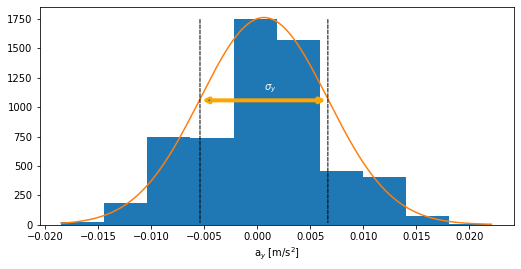

In [54]:
fig = plt.figure(figsize=(8.5,4))
plt.hist(ay)
muy = np.mean(ay)
sigmay = np.std(ay)
print('ay = {} +- {}'.format(muy, sigmay))
bw = (max(ax)-min(ax))/10
C = len(ax)*bw
C /= np.sqrt(2*np.pi)*sigmax
plt = plotNormal(min(ay), max(ay), C, muy, sigmay, plt)
plt.xlabel('a$_y$ [m/s$^2$]')
plt.annotate('$\\sigma_y$', xy=(muy, C*0.65), textcoords='data', color='white')
plt.annotate('',
             xy=(muy-sigmay, C*0.6),
             xytext=(muy+sigmay, C*0.6),
             arrowprops=dict(ec='orange', arrowstyle='<|-|>', lw=4))
plt.annotate('',
             xy=(muy-sigmay, 0),
             xytext=(muy-sigmay, C),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate('',
             xy=(muy+sigmay, 0),
             xytext=(muy+sigmay, C),
             arrowprops={'arrowstyle': '-', 'ls': 'dashed'})    
plt.show()

az = 6.828782515309109 +- 0.006715514633525124


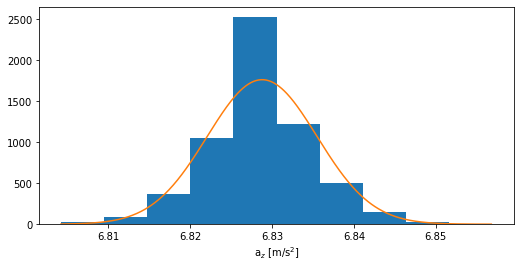

In [55]:
fig = plt.figure(figsize=(8.5,4))
plt.hist(az)
muz = np.mean(az)
sigmaz = np.std(az)
print('az = {} +- {}'.format(muz, sigmaz))
bw = (max(ax)-min(ax))/10
C = len(ax)*bw
C /= np.sqrt(2*np.pi)*sigmax
plt = plotNormal(min(az), max(az), C, muz, sigmaz, plt)
plt.xlabel('a$_z$ [m/s$^2$]')
plt.show()

a  = 9.869922010089416 +- 0.006599566841133716
estimated sigma_a = 0.006424509919918518


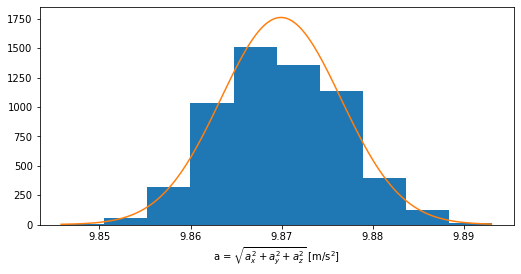

In [56]:
fig = plt.figure(figsize=(8.5,4))
plt.hist(a)
mu = np.mean(a)
sigma = np.std(a)
print('a  = {} +- {}'.format(mu, sigma))
print('estimated sigma_a = {}'.format(np.sqrt((mux/mu*sigmax)**2+(muy/mu*sigmay)**2+(muz/mu*sigmaz)**2)))
bw = (max(ax)-min(ax))/10
C = len(ax)*bw
C /= np.sqrt(2*np.pi)*sigmax
plt = plotNormal(min(a), max(a), C, mu, sigma, plt)
plt.xlabel('a = $\sqrt{a_x^2+a_y^2+a_z^2}$ [m/s$^2$]')    
plt.show()